<a href="https://colab.research.google.com/github/ntolayd/Projects/blob/main/football_prediction/football_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip "/content/gdrive/My Drive/football_data.zip"

In [4]:
columns_to_keep = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']
home_columns = ['FTHG', 'HTHG', 'HS','HST','HC','HF','HY','HR']
away_columns = ['FTAG', 'HTAG', 'AS','AST','AC','AF','AY','AR']

In [5]:
def prep_matches(df):
    
    new_df = df.copy()
    for i in new_df['HomeTeam'].unique():
        update_home = new_df[new_df['HomeTeam']==i].sort_values(['Date']).loc[:,home_columns].expanding().mean().shift(1)
        update_away = new_df[new_df['AwayTeam']==i].sort_values(['Date']).loc[:,away_columns].expanding().mean().shift(1)
        new_df.update(update_home)
        new_df.update(update_away)
        
    return new_df

In [6]:
def pos_change(row):
    if bool(re.search('RW|RF|ST|CF|LW|LF',row)):
        return 'forward'
    elif bool(re.search('CM|CDM|CAM|RM|LM',row)):
        return 'midfielder'
    elif bool(re.search('RWB|RB|CB|LB|LWB',row)):
        return 'defender'
    else:
        return 'goalkeeper'

In [7]:
def overall_count(players_df, league):
    df = pd.DataFrame(columns=['Team','>76','>80','>83','>86','>89','avg_overall'])
    for team in league:
        mini_df = players_df[players_df['club']==team]
        a = len(mini_df[mini_df['overall'] > 76])
        b = len(mini_df[mini_df['overall'] > 80])
        c = len(mini_df[mini_df['overall'] > 83])
        d = len(mini_df[mini_df['overall'] > 86])
        e = len(mini_df[mini_df['overall'] > 89])
        f= mini_df['overall'].mean()
        to_append = [team, a, b, c, d, e, f]
        a_series = pd.Series(to_append, index = df.columns)
        df = df.append(a_series, ignore_index=True)
    return df

**19/20 Season**

In [8]:
pl_1920 = pd.read_csv('data/pl_19_20.csv', parse_dates=['Date'],   dayfirst=True)
laliga_1920 = pd.read_csv('data/laliga_19_20.csv', parse_dates=['Date'],   dayfirst=True)
bundes_1920 = pd.read_csv('data/bundes_19_20.csv', parse_dates=['Date'],   dayfirst=True)
seria_1920 = pd.read_csv('data/seria_19_20.csv', parse_dates=['Date'],   dayfirst=True)

laliga_1920.replace('Espanol','Espanyol', inplace=True)


pl_1920_teams = pl_1920['HomeTeam'].unique()
laliga_1920_teams = laliga_1920['HomeTeam'].unique()
bundes_1920_teams = bundes_1920['HomeTeam'].unique()
seria_1920_teams = seria_1920['HomeTeam'].unique()

#Removing bet columns
pl_1920 = pl_1920[columns_to_keep]
laliga_1920 = laliga_1920[columns_to_keep]
bundes_1920 = bundes_1920[columns_to_keep]
seria_1920 = seria_1920[columns_to_keep]

pl_1920 = prep_matches(pl_1920)
laliga_1920 = prep_matches(laliga_1920)
bundes_1920 = prep_matches(bundes_1920)
seria_1920 = prep_matches(seria_1920)


#removing first week of each league
pl_1920 = pl_1920.iloc[10:,:]
bundes_1920 = bundes_1920.iloc[9:,:]
seria_1920 = seria_1920.iloc[10:,:]
laliga_1920 = laliga_1920.iloc[10:,:]

players_20 = pd.read_csv('data/players_20.csv')

player_columns_to_keep = ['sofifa_id','club','overall','player_positions']
players_20 = players_20[player_columns_to_keep]

players_20['player_positions'] = players_20['player_positions'].apply(pos_change)

#pl
players_20.replace('West Ham United','West Ham', inplace=True)
players_20.replace('Brighton & Hove Albion','Brighton', inplace=True)
players_20.replace('Norwich City','Norwich', inplace=True)
players_20.replace('Newcastle United','Newcastle', inplace=True)
players_20.replace('Leicester City','Leicester', inplace=True)
players_20.replace('Manchester City','Man City', inplace=True)
players_20.replace('Manchester United','Man United', inplace=True)
players_20.replace('Wolverhampton Wanderers','Wolves', inplace=True)
players_20.replace('Tottenham Hotspur','Tottenham', inplace=True)

#laliga
players_20.replace('Athletic Club de Bilbao','Ath Bilbao', inplace=True)
players_20.replace('RC Celta','Celta', inplace=True)
players_20.replace('Valencia CF','Valencia', inplace=True)
players_20.replace('RCD Mallorca','Mallorca', inplace=True)
players_20.replace('CD Leganés','Leganes', inplace=True)
players_20.replace('Villarreal CF','Villarreal', inplace=True)
players_20.replace('Deportivo Alavés','Alaves', inplace=True)
players_20.replace('RCD Espanyol','Espanyol', inplace=True)
players_20.replace('Real Betis','Betis', inplace=True)
players_20.replace('Atlético Madrid','Ath Madrid', inplace=True)
players_20.replace('Granada CF','Granada', inplace=True)
players_20.replace('Levante UD','Levante', inplace=True)
players_20.replace('CA Osasuna','Osasuna', inplace=True)
players_20.replace('Getafe CF','Getafe', inplace=True)
players_20.replace('FC Barcelona','Barcelona', inplace=True)
players_20.replace('Sevilla FC','Sevilla', inplace=True)
players_20.replace('Real Sociedad','Sociedad', inplace=True)
players_20.replace('SD Eibar','Eibar', inplace=True)
players_20.replace('Real Valladolid CF','Valladolid', inplace=True)

#bundesliga
players_20.replace('FC Bayern München','Bayern Munich', inplace=True)
players_20.replace('Borussia Dortmund','Dortmund', inplace=True)
players_20.replace('SV Werder Bremen','Werder Bremen', inplace=True)
players_20.replace('Bayer 04 Leverkusen','Leverkusen', inplace=True)
players_20.replace('VfL Wolfsburg','Wolfsburg', inplace=True)
players_20.replace('Borussia Mönchengladbach',"M'gladbach", inplace=True)
players_20.replace('Eintracht Frankfurt','Ein Frankfurt', inplace=True)
players_20.replace('1. FC Union Berlin','Union Berlin', inplace=True)
players_20.replace('1. FC Köln','FC Koln', inplace=True)
players_20.replace('FC Augsburg','Augsburg', inplace=True)
players_20.replace('Fortuna Düsseldorf','Fortuna Dusseldorf', inplace=True)
players_20.replace('TSG 1899 Hoffenheim','Hoffenheim', inplace=True)
players_20.replace('1. FSV Mainz 05','Mainz', inplace=True)
players_20.replace('SC Paderborn 07','Paderborn', inplace=True)
players_20.replace('FC Schalke 04','Schalke 04', inplace=True)
players_20.replace('Hertha BSC','Hertha', inplace=True)
players_20.replace('SC Freiburg','Freiburg', inplace=True)


#seria a
players_20.replace('SPAL','Spal', inplace=True)
players_20.replace('Hellas Verona','Verona', inplace=True)

pl_1920 = pl_1920.merge(overall_count(players_20, pl_1920_teams), how='left', left_on='HomeTeam',right_on='Team')
pl_1920.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
pl_1920 = pl_1920.merge(overall_count(players_20, pl_1920_teams), how='left', left_on='AwayTeam',right_on='Team')
pl_1920.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

bundes_1920 = bundes_1920.merge(overall_count(players_20, bundes_1920_teams), how='left', left_on='HomeTeam',right_on='Team')
bundes_1920.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
bundes_1920 = bundes_1920.merge(overall_count(players_20, bundes_1920_teams), how='left', left_on='AwayTeam',right_on='Team')
bundes_1920.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

laliga_1920 = laliga_1920.merge(overall_count(players_20, laliga_1920_teams), how='left', left_on='HomeTeam',right_on='Team')
laliga_1920.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
laliga_1920 = laliga_1920.merge(overall_count(players_20, laliga_1920_teams), how='left', left_on='AwayTeam',right_on='Team')
laliga_1920.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

seria_1920 = seria_1920.merge(overall_count(players_20, seria_1920_teams), how='left', left_on='HomeTeam',right_on='Team')
seria_1920.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
seria_1920 = seria_1920.merge(overall_count(players_20, seria_1920_teams), how='left', left_on='AwayTeam',right_on='Team')
seria_1920.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)


all_1920 = pd.concat([pl_1920,bundes_1920,laliga_1920,seria_1920],ignore_index=True).drop(['Team_x','Team_y'], axis=1)

**18/19**

In [9]:
pl_1819 = pd.read_csv('data/pl_18_19.csv', parse_dates=['Date'],   dayfirst=True)
laliga_1819 = pd.read_csv('data/laliga_18_19.csv', parse_dates=['Date'],   dayfirst=True)
bundes_1819 = pd.read_csv('data/bundes_18_19.csv', parse_dates=['Date'],   dayfirst=True)
seria_1819 = pd.read_csv('data/seria_18_19.csv', parse_dates=['Date'],   dayfirst=True)

laliga_1819.replace('Espanol','Espanyol', inplace=True)


pl_1819_teams = pl_1819['HomeTeam'].unique()
laliga_1819_teams = laliga_1819['HomeTeam'].unique()
bundes_1819_teams = bundes_1819['HomeTeam'].unique()
seria_1819_teams = seria_1819['HomeTeam'].unique()

columns_to_keep = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']
home_columns = ['FTHG', 'HTHG', 'HS','HST','HC','HF','HY','HR']
away_columns = ['FTAG', 'HTAG', 'AS','AST','AC','AF','AY','AR']

#Removing bet columns
pl_1819 = pl_1819[columns_to_keep]
laliga_1819 = laliga_1819[columns_to_keep]
bundes_1819 = bundes_1819[columns_to_keep]
seria_1819 = seria_1819[columns_to_keep]

pl_1819 = prep_matches(pl_1819) 
laliga_1819 = prep_matches(laliga_1819)
bundes_1819 = prep_matches(bundes_1819)
seria_1819 = prep_matches(seria_1819)

pl_1819 = pl_1819.iloc[10:,:]
laliga_1819 = laliga_1819.iloc[10:,:]
bundes_1819 = bundes_1819.iloc[9:,:]
seria_1819 = seria_1819.iloc[8:,:]


laliga_1819.replace('Espanol','Espanyol', inplace=True)

players_19 = pd.read_csv('data/players_19.csv')
players_19 = players_19[player_columns_to_keep]

players_19['player_positions'] = players_19['player_positions'].apply(pos_change)

#pl
players_19.replace('West Ham United','West Ham', inplace=True)
players_19.replace('Brighton & Hove Albion','Brighton', inplace=True)
players_19.replace('Norwich City','Norwich', inplace=True)
players_19.replace('Newcastle United','Newcastle', inplace=True)
players_19.replace('Leicester City','Leicester', inplace=True)
players_19.replace('Manchester City','Man City', inplace=True)
players_19.replace('Manchester United','Man United', inplace=True)
players_19.replace('Wolverhampton Wanderers','Wolves', inplace=True)
players_19.replace('Tottenham Hotspur','Tottenham', inplace=True)
players_19.replace('Cardiff City','Cardiff', inplace=True)
players_19.replace('Huddersfield Town','Huddersfield', inplace=True)

#laliga
players_19.replace('Athletic Club de Bilbao','Ath Bilbao', inplace=True)
players_19.replace('RC Celta','Celta', inplace=True)
players_19.replace('Valencia CF','Valencia', inplace=True)
players_19.replace('RCD Mallorca','Mallorca', inplace=True)
players_19.replace('CD Leganés','Leganes', inplace=True)
players_19.replace('Villarreal CF','Villarreal', inplace=True)
players_19.replace('Deportivo Alavés','Alaves', inplace=True)
players_19.replace('RCD Espanyol','Espanyol', inplace=True)
players_19.replace('Real Betis','Betis', inplace=True)
players_19.replace('Atlético Madrid','Ath Madrid', inplace=True)
players_19.replace('Granada CF','Granada', inplace=True)
players_19.replace('Levante UD','Levante', inplace=True)
players_19.replace('CA Osasuna','Osasuna', inplace=True)
players_19.replace('Getafe CF','Getafe', inplace=True)
players_19.replace('FC Barcelona','Barcelona', inplace=True)
players_19.replace('Sevilla FC','Sevilla', inplace=True)
players_19.replace('Real Sociedad','Sociedad', inplace=True)
players_19.replace('SD Eibar','Eibar', inplace=True)
players_19.replace('Real Valladolid CF','Valladolid', inplace=True)
players_19.replace('Girona FC','Girona', inplace=True)
players_19.replace('SD Huesca','Huesca', inplace=True)
players_19.replace('Rayo Vallecano','Vallecano', inplace=True)


#bundesliga
players_19.replace('FC Bayern München','Bayern Munich', inplace=True)
players_19.replace('Borussia Dortmund','Dortmund', inplace=True)
players_19.replace('SV Werder Bremen','Werder Bremen', inplace=True)
players_19.replace('Bayer 04 Leverkusen','Leverkusen', inplace=True)
players_19.replace('VfL Wolfsburg','Wolfsburg', inplace=True)
players_19.replace('Borussia Mönchengladbach',"M'gladbach", inplace=True)
players_19.replace('Eintracht Frankfurt','Ein Frankfurt', inplace=True)
players_19.replace('1. FC Union Berlin','Union Berlin', inplace=True)
players_19.replace('1. FC Köln','FC Koln', inplace=True)
players_19.replace('FC Augsburg','Augsburg', inplace=True)
players_19.replace('Fortuna Düsseldorf','Fortuna Dusseldorf', inplace=True)
players_19.replace('TSG 1899 Hoffenheim','Hoffenheim', inplace=True)
players_19.replace('1. FSV Mainz 05','Mainz', inplace=True)
players_19.replace('SC Paderborn 07','Paderborn', inplace=True)
players_19.replace('FC Schalke 04','Schalke 04', inplace=True)
players_19.replace('Hertha BSC','Hertha', inplace=True)
players_19.replace('SC Freiburg','Freiburg', inplace=True)
players_19.replace('Hannover 96','Hannover', inplace=True)
players_19.replace('VfB Stuttgart','Stuttgart', inplace=True)
players_19.replace('1. FC Nürnberg','Nurnberg', inplace=True)

#seria a
players_19.replace('SPAL','Spal', inplace=True)
players_19.replace('Hellas Verona','Verona', inplace=True)
players_19.replace('Chievo Verona','Chievo', inplace=True)


pl_1819 = pl_1819.merge(overall_count(players_19, pl_1819_teams), how='left', left_on='HomeTeam',right_on='Team')
pl_1819.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
pl_1819 = pl_1819.merge(overall_count(players_19, pl_1819_teams), how='left', left_on='AwayTeam',right_on='Team')
pl_1819.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

bundes_1819 = bundes_1819.merge(overall_count(players_19, bundes_1819_teams), how='left', left_on='HomeTeam',right_on='Team')
bundes_1819.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
bundes_1819 = bundes_1819.merge(overall_count(players_19, bundes_1819_teams), how='left', left_on='AwayTeam',right_on='Team')
bundes_1819.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

laliga_1819 = laliga_1819.merge(overall_count(players_19, laliga_1819_teams), how='left', left_on='HomeTeam',right_on='Team')
laliga_1819.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
laliga_1819 = laliga_1819.merge(overall_count(players_19, laliga_1819_teams), how='left', left_on='AwayTeam',right_on='Team')
laliga_1819.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

seria_1819 = seria_1819.merge(overall_count(players_19, seria_1819_teams), how='left', left_on='HomeTeam',right_on='Team')
seria_1819.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
seria_1819 = seria_1819.merge(overall_count(players_19, seria_1819_teams), how='left', left_on='AwayTeam',right_on='Team')
seria_1819.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)


all_1819 = pd.concat([pl_1819,bundes_1819,laliga_1819,seria_1819],ignore_index=True).drop(['Team_x','Team_y'], axis=1)

**17/18**

In [10]:
pl_1718 = pd.read_csv('data/pl_17_18.csv', parse_dates=['Date'],   dayfirst=True)
laliga_1718 = pd.read_csv('data/laliga_17_18.csv', parse_dates=['Date'],   dayfirst=True)
bundes_1718 = pd.read_csv('data/bundes_17_18.csv', parse_dates=['Date'],   dayfirst=True)
seria_1718 = pd.read_csv('data/seria_17_18.csv', parse_dates=['Date'],   dayfirst=True)

laliga_1718.replace('Espanol','Espanyol', inplace=True)

pl_1718_teams = pl_1718['HomeTeam'].unique()
laliga_1718_teams = laliga_1718['HomeTeam'].unique()
bundes_1718_teams = bundes_1718['HomeTeam'].unique()
seria_1718_teams = seria_1718['HomeTeam'].unique()

#Removing bet columns
pl_1718 = pl_1718[columns_to_keep]
laliga_1718 = laliga_1718[columns_to_keep]
bundes_1718 = bundes_1718[columns_to_keep]
seria_1718 = seria_1718[columns_to_keep]

pl_1718 = prep_matches(pl_1718) 
laliga_1718 = prep_matches(laliga_1718)
bundes_1718 = prep_matches(bundes_1718)
seria_1718 = prep_matches(seria_1718)

pl_1718 = pl_1718.iloc[10:,:]
laliga_1718 = laliga_1718.iloc[10:,:]
bundes_1718 = bundes_1718.iloc[9:,:]
seria_1718 = seria_1718.iloc[10:,:]


players_18 = pd.read_csv('data/players_18.csv')
players_18 = players_18[player_columns_to_keep]

players_18['player_positions'] = players_18['player_positions'].apply(pos_change)

#pl
players_18.replace('West Ham United','West Ham', inplace=True)
players_18.replace('Brighton & Hove Albion','Brighton', inplace=True)
players_18.replace('Norwich City','Norwich', inplace=True)
players_18.replace('Newcastle United','Newcastle', inplace=True)
players_18.replace('Leicester City','Leicester', inplace=True)
players_18.replace('Manchester City','Man City', inplace=True)
players_18.replace('Manchester United','Man United', inplace=True)
players_18.replace('Wolverhampton Wanderers','Wolves', inplace=True)
players_18.replace('Tottenham Hotspur','Tottenham', inplace=True)
players_18.replace('Cardiff City','Cardiff', inplace=True)
players_18.replace('Huddersfield Town','Huddersfield', inplace=True)
players_18.replace('Stoke City','Stoke', inplace=True)
players_18.replace('Swansea City','Swansea', inplace=True)
players_18.replace('West Bromwich Albion','West Brom', inplace=True)


#laliga
players_18.replace('Athletic Club de Bilbao','Ath Bilbao', inplace=True)
players_18.replace('RC Celta','Celta', inplace=True)
players_18.replace('Valencia CF','Valencia', inplace=True)
players_18.replace('RCD Mallorca','Mallorca', inplace=True)
players_18.replace('CD Leganés','Leganes', inplace=True)
players_18.replace('Villarreal CF','Villarreal', inplace=True)
players_18.replace('Deportivo Alavés','Alaves', inplace=True)
players_18.replace('RCD Espanyol','Espanyol', inplace=True)
players_18.replace('Real Betis','Betis', inplace=True)
players_18.replace('Atlético Madrid','Ath Madrid', inplace=True)
players_18.replace('Granada CF','Granada', inplace=True)
players_18.replace('Levante UD','Levante', inplace=True)
players_18.replace('CA Osasuna','Osasuna', inplace=True)
players_18.replace('Getafe CF','Getafe', inplace=True)
players_18.replace('FC Barcelona','Barcelona', inplace=True)
players_18.replace('Sevilla FC','Sevilla', inplace=True)
players_18.replace('Real Sociedad','Sociedad', inplace=True)
players_18.replace('SD Eibar','Eibar', inplace=True)
players_18.replace('Real Valladolid CF','Valladolid', inplace=True)
players_18.replace('Girona FC','Girona', inplace=True)
players_18.replace('SD Huesca','Huesca', inplace=True)
players_18.replace('Rayo Vallecano','Vallecano', inplace=True)
players_18.replace('Deportivo de La Coruña','La Coruna', inplace=True)
players_18.replace('UD Las Palmas','Las Palmas', inplace=True)
players_18.replace('Málaga CF','Malaga', inplace=True)



#bundesliga
players_18.replace('FC Bayern München','Bayern Munich', inplace=True)
players_18.replace('Borussia Dortmund','Dortmund', inplace=True)
players_18.replace('SV Werder Bremen','Werder Bremen', inplace=True)
players_18.replace('Bayer 04 Leverkusen','Leverkusen', inplace=True)
players_18.replace('VfL Wolfsburg','Wolfsburg', inplace=True)
players_18.replace('Borussia Mönchengladbach',"M'gladbach", inplace=True)
players_18.replace('Eintracht Frankfurt','Ein Frankfurt', inplace=True)
players_18.replace('1. FC Union Berlin','Union Berlin', inplace=True)
players_18.replace('1. FC Köln','FC Koln', inplace=True)
players_18.replace('FC Augsburg','Augsburg', inplace=True)
players_18.replace('Fortuna Düsseldorf','Fortuna Dusseldorf', inplace=True)
players_18.replace('TSG 1899 Hoffenheim','Hoffenheim', inplace=True)
players_18.replace('1. FSV Mainz 05','Mainz', inplace=True)
players_18.replace('SC Paderborn 07','Paderborn', inplace=True)
players_18.replace('FC Schalke 04','Schalke 04', inplace=True)
players_18.replace('Hertha BSC','Hertha', inplace=True)
players_18.replace('SC Freiburg','Freiburg', inplace=True)
players_18.replace('Hannover 96','Hannover', inplace=True)
players_18.replace('VfB Stuttgart','Stuttgart', inplace=True)
players_18.replace('1. FC Nürnberg','Nurnberg', inplace=True)
players_18.replace('Hamburger SV','Hamburg', inplace=True)


#seria a
players_18.replace('SPAL','Spal', inplace=True)
players_18.replace('Hellas Verona','Verona', inplace=True)
players_18.replace('Chievo Verona','Chievo', inplace=True)


pl_1718 = pl_1718.merge(overall_count(players_18, pl_1718_teams), how='left', left_on='HomeTeam',right_on='Team')
pl_1718.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
pl_1718 = pl_1718.merge(overall_count(players_18, pl_1718_teams), how='left', left_on='AwayTeam',right_on='Team')
pl_1718.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

bundes_1718 = bundes_1718.merge(overall_count(players_18, bundes_1718_teams), how='left', left_on='HomeTeam',right_on='Team')
bundes_1718.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
bundes_1718 = bundes_1718.merge(overall_count(players_18, bundes_1718_teams), how='left', left_on='AwayTeam',right_on='Team')
bundes_1718.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

laliga_1718 = laliga_1718.merge(overall_count(players_18, laliga_1718_teams), how='left', left_on='HomeTeam',right_on='Team')
laliga_1718.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
laliga_1718 = laliga_1718.merge(overall_count(players_18, laliga_1718_teams), how='left', left_on='AwayTeam',right_on='Team')
laliga_1718.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

seria_1718 = seria_1718.merge(overall_count(players_18, seria_1718_teams), how='left', left_on='HomeTeam',right_on='Team')
seria_1718.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
seria_1718 = seria_1718.merge(overall_count(players_18, seria_1718_teams), how='left', left_on='AwayTeam',right_on='Team')
seria_1718.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)


all_1718 = pd.concat([pl_1718,bundes_1718,laliga_1718,seria_1718],ignore_index=True).drop(['Team_x','Team_y'], axis=1)

**16/17**

In [11]:
pl_1617 = pd.read_csv('data/pl_16_17.csv', parse_dates=['Date'],   dayfirst=True)
laliga_1617 = pd.read_csv('data/laliga_16_17.csv', parse_dates=['Date'],   dayfirst=True)
bundes_1617 = pd.read_csv('data/bundes_16_17.csv', parse_dates=['Date'],   dayfirst=True)
seria_1617 = pd.read_csv('data/seria_16_17.csv', parse_dates=['Date'],   dayfirst=True)

laliga_1617.replace('Espanol','Espanyol', inplace=True)
laliga_1617.replace('Sp Gijon','Dijon FCO', inplace=True)


pl_1617_teams = pl_1617['HomeTeam'].unique()
laliga_1617_teams = laliga_1617['HomeTeam'].unique()
bundes_1617_teams = bundes_1617['HomeTeam'].unique()
seria_1617_teams = seria_1617['HomeTeam'].unique()

#Removing bet columns
pl_1617 = pl_1617[columns_to_keep]
laliga_1617 = laliga_1617[columns_to_keep]
bundes_1617 = bundes_1617[columns_to_keep]
seria_1617 = seria_1617[columns_to_keep]

pl_1617 = prep_matches(pl_1617) 
laliga_1617 = prep_matches(laliga_1617)
bundes_1617 = prep_matches(bundes_1617)
seria_1617 = prep_matches(seria_1617)

pl_1617 = pl_1617.iloc[10:,:]
laliga_1617 = laliga_1617.iloc[10:,:]
bundes_1617 = bundes_1617.iloc[9:,:]
seria_1617 = seria_1617.iloc[10:,:]


players_17 = pd.read_csv('data/players_17.csv')
players_17 = players_17[player_columns_to_keep]

players_17['player_positions'] = players_17['player_positions'].apply(pos_change)

#pl
players_17.replace('West Ham United','West Ham', inplace=True)
players_17.replace('Brighton & Hove Albion','Brighton', inplace=True)
players_17.replace('Norwich City','Norwich', inplace=True)
players_17.replace('Newcastle United','Newcastle', inplace=True)
players_17.replace('Leicester City','Leicester', inplace=True)
players_17.replace('Manchester City','Man City', inplace=True)
players_17.replace('Manchester United','Man United', inplace=True)
players_17.replace('Wolverhampton Wanderers','Wolves', inplace=True)
players_17.replace('Tottenham Hotspur','Tottenham', inplace=True)
players_17.replace('Cardiff City','Cardiff', inplace=True)
players_17.replace('Huddersfield Town','Huddersfield', inplace=True)
players_17.replace('Stoke City','Stoke', inplace=True)
players_17.replace('Swansea City','Swansea', inplace=True)
players_17.replace('West Bromwich Albion','West Brom', inplace=True)
players_17.replace('Hull City','Hull', inplace=True)



#laliga
players_17.replace('Athletic Club de Bilbao','Ath Bilbao', inplace=True)
players_17.replace('RC Celta','Celta', inplace=True)
players_17.replace('Valencia CF','Valencia', inplace=True)
players_17.replace('RCD Mallorca','Mallorca', inplace=True)
players_17.replace('CD Leganés','Leganes', inplace=True)
players_17.replace('Villarreal CF','Villarreal', inplace=True)
players_17.replace('Deportivo Alavés','Alaves', inplace=True)
players_17.replace('RCD Espanyol','Espanyol', inplace=True)
players_17.replace('Real Betis','Betis', inplace=True)
players_17.replace('Atlético Madrid','Ath Madrid', inplace=True)
players_17.replace('Granada CF','Granada', inplace=True)
players_17.replace('Levante UD','Levante', inplace=True)
players_17.replace('CA Osasuna','Osasuna', inplace=True)
players_17.replace('Getafe CF','Getafe', inplace=True)
players_17.replace('FC Barcelona','Barcelona', inplace=True)
players_17.replace('Sevilla FC','Sevilla', inplace=True)
players_17.replace('Real Sociedad','Sociedad', inplace=True)
players_17.replace('SD Eibar','Eibar', inplace=True)
players_17.replace('Real Valladolid CF','Valladolid', inplace=True)
players_17.replace('Girona FC','Girona', inplace=True)
players_17.replace('SD Huesca','Huesca', inplace=True)
players_17.replace('Rayo Vallecano','Vallecano', inplace=True)
players_17.replace('Deportivo de La Coruña','La Coruna', inplace=True)
players_17.replace('UD Las Palmas','Las Palmas', inplace=True)
players_17.replace('Málaga CF','Malaga', inplace=True)



#bundesliga
players_17.replace('FC Bayern München','Bayern Munich', inplace=True)
players_17.replace('Borussia Dortmund','Dortmund', inplace=True)
players_17.replace('SV Werder Bremen','Werder Bremen', inplace=True)
players_17.replace('Bayer 04 Leverkusen','Leverkusen', inplace=True)
players_17.replace('VfL Wolfsburg','Wolfsburg', inplace=True)
players_17.replace('Borussia Mönchengladbach',"M'gladbach", inplace=True)
players_17.replace('Eintracht Frankfurt','Ein Frankfurt', inplace=True)
players_17.replace('1. FC Union Berlin','Union Berlin', inplace=True)
players_17.replace('1. FC Köln','FC Koln', inplace=True)
players_17.replace('FC Augsburg','Augsburg', inplace=True)
players_17.replace('Fortuna Düsseldorf','Fortuna Dusseldorf', inplace=True)
players_17.replace('TSG 1799 Hoffenheim','Hoffenheim', inplace=True)
players_17.replace('1. FSV Mainz 05','Mainz', inplace=True)
players_17.replace('SC Paderborn 07','Paderborn', inplace=True)
players_17.replace('FC Schalke 04','Schalke 04', inplace=True)
players_17.replace('Hertha BSC','Hertha', inplace=True)
players_17.replace('SC Freiburg','Freiburg', inplace=True)
players_17.replace('Hannover 96','Hannover', inplace=True)
players_17.replace('VfB Stuttgart','Stuttgart', inplace=True)
players_17.replace('1. FC Nürnberg','Nurnberg', inplace=True)
players_17.replace('Hamburger SV','Hamburg', inplace=True)
players_17.replace('TSG 1899 Hoffenheim','Hoffenheim', inplace=True)
players_17.replace('SV Darmstadt 98','Darmstadt', inplace=True)
players_17.replace('FC Ingolstadt 04','Ingolstadt', inplace=True)

#seria a
players_17.replace('SPAL','Spal', inplace=True)
players_17.replace('Hellas Verona','Verona', inplace=True)
players_17.replace('Chievo Verona','Chievo', inplace=True)


pl_1617 = pl_1617.merge(overall_count(players_17, pl_1617_teams), how='left', left_on='HomeTeam',right_on='Team')
pl_1617.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
pl_1617 = pl_1617.merge(overall_count(players_17, pl_1617_teams), how='left', left_on='AwayTeam',right_on='Team')
pl_1617.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

bundes_1617 = bundes_1617.merge(overall_count(players_17, bundes_1617_teams), how='left', left_on='HomeTeam',right_on='Team')
bundes_1617.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
bundes_1617 = bundes_1617.merge(overall_count(players_17, bundes_1617_teams), how='left', left_on='AwayTeam',right_on='Team')
bundes_1617.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

laliga_1617 = laliga_1617.merge(overall_count(players_17, laliga_1617_teams), how='left', left_on='HomeTeam',right_on='Team')
laliga_1617.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
laliga_1617 = laliga_1617.merge(overall_count(players_17, laliga_1617_teams), how='left', left_on='AwayTeam',right_on='Team')
laliga_1617.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

seria_1617 = seria_1617.merge(overall_count(players_17, seria_1617_teams), how='left', left_on='HomeTeam',right_on='Team')
seria_1617.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
seria_1617 = seria_1617.merge(overall_count(players_17, seria_1617_teams), how='left', left_on='AwayTeam',right_on='Team')
seria_1617.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)


all_1617 = pd.concat([pl_1617,bundes_1617,laliga_1617,seria_1617],ignore_index=True).drop(['Team_x','Team_y'], axis=1)

**15/16**

In [12]:
pl_1516 = pd.read_csv('data/pl_15_16.csv', parse_dates=['Date'],   dayfirst=True)
laliga_1516 = pd.read_csv('data/laliga_15_16.csv', parse_dates=['Date'],   dayfirst=True)
bundes_1516 = pd.read_csv('data/bundes_15_16.csv', parse_dates=['Date'],   dayfirst=True)
seria_1516 = pd.read_csv('data/seria_15_16.csv', parse_dates=['Date'],   dayfirst=True).dropna()

laliga_1516.replace('Espanol','Espanyol', inplace=True)
laliga_1516.replace('Sp Gijon','Dijon FCO', inplace=True)


pl_1516_teams = pl_1516['HomeTeam'].unique()
laliga_1516_teams = laliga_1516['HomeTeam'].unique()
bundes_1516_teams = bundes_1516['HomeTeam'].unique()
seria_1516_teams = seria_1516['HomeTeam'].unique()

#Removing bet columns
pl_1516 = pl_1516[columns_to_keep]
laliga_1516 = laliga_1516[columns_to_keep]
bundes_1516 = bundes_1516[columns_to_keep]
seria_1516 = seria_1516[columns_to_keep]

pl_1516 = prep_matches(pl_1516) 
laliga_1516 = prep_matches(laliga_1516)
bundes_1516 = prep_matches(bundes_1516)
seria_1516 = prep_matches(seria_1516)

pl_1516 = pl_1516.iloc[10:,:]
laliga_1516 = laliga_1516.iloc[10:,:]
bundes_1516 = bundes_1516.iloc[9:,:]
seria_1516 = seria_1516.iloc[10:,:]


players_16 = pd.read_csv('data/players_16.csv')
players_16 = players_16[player_columns_to_keep]

players_16['player_positions'] = players_16['player_positions'].apply(pos_change)

#pl
players_16.replace('West Ham United','West Ham', inplace=True)
players_16.replace('Brighton & Hove Albion','Brighton', inplace=True)
players_16.replace('Norwich City','Norwich', inplace=True)
players_16.replace('Newcastle United','Newcastle', inplace=True)
players_16.replace('Leicester City','Leicester', inplace=True)
players_16.replace('Manchester City','Man City', inplace=True)
players_16.replace('Manchester United','Man United', inplace=True)
players_16.replace('Wolverhampton Wanderers','Wolves', inplace=True)
players_16.replace('Tottenham Hotspur','Tottenham', inplace=True)
players_16.replace('Cardiff City','Cardiff', inplace=True)
players_16.replace('Huddersfield Town','Huddersfield', inplace=True)
players_16.replace('Stoke City','Stoke', inplace=True)
players_16.replace('Swansea City','Swansea', inplace=True)
players_16.replace('West Bromwich Albion','West Brom', inplace=True)


#laliga
players_16.replace('Athletic Club de Bilbao','Ath Bilbao', inplace=True)
players_16.replace('RC Celta','Celta', inplace=True)
players_16.replace('Valencia CF','Valencia', inplace=True)
players_16.replace('RCD Mallorca','Mallorca', inplace=True)
players_16.replace('CD Leganés','Leganes', inplace=True)
players_16.replace('Villarreal CF','Villarreal', inplace=True)
players_16.replace('Deportivo Alavés','Alaves', inplace=True)
players_16.replace('RCD Espanyol','Espanyol', inplace=True)
players_16.replace('Real Betis','Betis', inplace=True)
players_16.replace('Atlético Madrid','Ath Madrid', inplace=True)
players_16.replace('Granada CF','Granada', inplace=True)
players_16.replace('Levante UD','Levante', inplace=True)
players_16.replace('CA Osasuna','Osasuna', inplace=True)
players_16.replace('Getafe CF','Getafe', inplace=True)
players_16.replace('FC Barcelona','Barcelona', inplace=True)
players_16.replace('Sevilla FC','Sevilla', inplace=True)
players_16.replace('Real Sociedad','Sociedad', inplace=True)
players_16.replace('SD Eibar','Eibar', inplace=True)
players_16.replace('Real Valladolid CF','Valladolid', inplace=True)
players_16.replace('Girona FC','Girona', inplace=True)
players_16.replace('SD Huesca','Huesca', inplace=True)
players_16.replace('Rayo Vallecano','Vallecano', inplace=True)
players_16.replace('Deportivo de La Coruña','La Coruna', inplace=True)
players_16.replace('UD Las Palmas','Las Palmas', inplace=True)
players_16.replace('Málaga CF','Malaga', inplace=True)



#bundesliga
players_16.replace('FC Bayern München','Bayern Munich', inplace=True)
players_16.replace('Borussia Dortmund','Dortmund', inplace=True)
players_16.replace('SV Werder Bremen','Werder Bremen', inplace=True)
players_16.replace('Bayer 04 Leverkusen','Leverkusen', inplace=True)
players_16.replace('VfL Wolfsburg','Wolfsburg', inplace=True)
players_16.replace('Borussia Mönchengladbach',"M'gladbach", inplace=True)
players_16.replace('Eintracht Frankfurt','Ein Frankfurt', inplace=True)
players_16.replace('1. FC Union Berlin','Union Berlin', inplace=True)
players_16.replace('1. FC Köln','FC Koln', inplace=True)
players_16.replace('FC Augsburg','Augsburg', inplace=True)
players_16.replace('Fortuna Düsseldorf','Fortuna Dusseldorf', inplace=True)
players_16.replace('TSG 1699 Hoffenheim','Hoffenheim', inplace=True)
players_16.replace('1. FSV Mainz 05','Mainz', inplace=True)
players_16.replace('SC Paderborn 07','Paderborn', inplace=True)
players_16.replace('FC Schalke 04','Schalke 04', inplace=True)
players_16.replace('Hertha BSC','Hertha', inplace=True)
players_16.replace('SC Freiburg','Freiburg', inplace=True)
players_16.replace('Hannover 96','Hannover', inplace=True)
players_16.replace('VfB Stuttgart','Stuttgart', inplace=True)
players_16.replace('1. FC Nürnberg','Nurnberg', inplace=True)
players_16.replace('Hamburger SV','Hamburg', inplace=True)
players_16.replace('TSG 1899 Hoffenheim','Hoffenheim', inplace=True)
players_16.replace('SV Darmstadt 98','Darmstadt', inplace=True)
players_16.replace('FC Ingolstadt 04','Ingolstadt', inplace=True)

#seria a
players_16.replace('SPAL','Spal', inplace=True)
players_16.replace('Hellas Verona','Verona', inplace=True)
players_16.replace('Chievo Verona','Chievo', inplace=True)


pl_1516 = pl_1516.merge(overall_count(players_16, pl_1516_teams), how='left', left_on='HomeTeam',right_on='Team')
pl_1516.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
pl_1516 = pl_1516.merge(overall_count(players_16, pl_1516_teams), how='left', left_on='AwayTeam',right_on='Team')
pl_1516.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

bundes_1516 = bundes_1516.merge(overall_count(players_16, bundes_1516_teams), how='left', left_on='HomeTeam',right_on='Team')
bundes_1516.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
bundes_1516 = bundes_1516.merge(overall_count(players_16, bundes_1516_teams), how='left', left_on='AwayTeam',right_on='Team')
bundes_1516.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

laliga_1516 = laliga_1516.merge(overall_count(players_16, laliga_1516_teams), how='left', left_on='HomeTeam',right_on='Team')
laliga_1516.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
laliga_1516 = laliga_1516.merge(overall_count(players_16, laliga_1516_teams), how='left', left_on='AwayTeam',right_on='Team')
laliga_1516.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)

seria_1516 = seria_1516.merge(overall_count(players_16, seria_1516_teams), how='left', left_on='HomeTeam',right_on='Team')
seria_1516.rename(columns={">76": "HomeTeam_>76", ">80": "HomeTeam_>80",">83": "HomeTeam_>83",">86": "HomeTeam_>86",">89": "HomeTeam_>89","avg_overall": "HomeTeam_avg_overall"}, inplace=True)
seria_1516 = seria_1516.merge(overall_count(players_16, seria_1516_teams), how='left', left_on='AwayTeam',right_on='Team')
seria_1516.rename(columns={">76": "AwayTeam_>76", ">80": "AwayTeam_>80",">83": "AwayTeam_>83",">86": "AwayTeam_>86",">89": "AwayTeam_>89","avg_overall": "AwayTeam_avg_overall"}, inplace=True)


all_1516 = pd.concat([pl_1516,bundes_1516,laliga_1516,seria_1516],ignore_index=True).drop(['Team_x','Team_y'], axis=1)


In [13]:
#merged data
final_df = pd.concat([all_1920,all_1819,all_1718,all_1617,all_1516],ignore_index=True)

final_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HomeTeam_>76,HomeTeam_>80,HomeTeam_>83,HomeTeam_>86,HomeTeam_>89,HomeTeam_avg_overall,AwayTeam_>76,AwayTeam_>80,AwayTeam_>83,AwayTeam_>86,AwayTeam_>89,AwayTeam_avg_overall
0,2019-08-17,Arsenal,Burnley,2.000000,1.000000,H,1.000000,1.000000,D,16.000000,18.000000,9.000000,5.000000,10.000000,7.000000,13.000000,11.000000,2.000000,1.000000,0.000000,0.000000,16,11,5,1,0,75.060606,10,0,0,0,0,71.303030
1,2019-08-17,Aston Villa,Bournemouth,1.000000,2.000000,A,0.000000,2.000000,A,22.000000,12.000000,7.000000,4.000000,10.000000,5.000000,10.000000,13.000000,0.000000,2.000000,0.000000,0.000000,4,0,0,0,0,69.181818,8,1,0,0,0,72.303030
2,2019-08-17,Brighton,West Ham,1.000000,1.000000,D,0.000000,0.000000,D,16.000000,8.000000,4.000000,3.000000,8.000000,6.000000,11.000000,10.000000,0.000000,2.000000,0.000000,0.000000,7,0,0,0,0,72.393939,14,4,1,0,0,72.575758
3,2019-08-17,Everton,Watford,1.000000,0.000000,H,1.000000,0.000000,H,12.000000,8.000000,2.000000,2.000000,4.000000,7.000000,11.000000,11.000000,2.000000,3.000000,0.000000,0.000000,18,3,0,0,0,75.121212,12,1,0,0,0,75.000000
4,2019-08-17,Norwich,Newcastle,3.000000,1.000000,H,1.000000,0.000000,H,15.000000,10.000000,8.000000,3.000000,7.000000,5.000000,9.000000,11.000000,1.000000,3.000000,0.000000,0.000000,3,0,0,0,0,69.333333,8,0,0,0,0,73.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7031,2016-05-15,Empoli,Torino,1.111111,1.444444,H,0.500000,0.500000,H,13.388889,11.722222,3.888889,4.388889,5.166667,4.777778,12.944444,17.111111,1.833333,2.833333,0.111111,0.000000,1,0,0,0,0,68.480000,8,1,0,0,0,74.035714
7032,2016-05-15,Genoa,Atalanta,1.555556,0.666667,A,0.500000,0.333333,D,14.000000,10.388889,4.777778,2.944444,5.944444,3.722222,15.222222,17.833333,2.166667,2.833333,0.277778,0.555556,6,1,0,0,0,71.793103,3,0,0,0,0,71.814815
7033,2016-05-15,Lazio,Fiorentina,1.666667,1.222222,A,0.444444,0.722222,A,14.777778,13.277778,4.333333,3.944444,6.777778,4.277778,15.222222,14.666667,2.666667,3.166667,0.111111,0.055556,15,5,0,0,0,75.233333,10,1,0,0,0,73.960000
7034,2016-05-15,Palermo,Verona,1.166667,0.611111,H,0.388889,0.055556,H,12.611111,10.666667,3.666667,2.777778,5.388889,4.611111,15.777778,15.333333,2.500000,2.388889,0.111111,0.222222,3,0,0,0,0,68.925926,3,0,0,0,0,70.961538


**Modelling**

In [14]:
from sklearn.preprocessing import LabelEncoder

### encoding output variable
encoder = LabelEncoder()
final_df['FTR'] = encoder.fit_transform(final_df['FTR'])

final_df.dropna(how='any', inplace=True)

X = final_df.drop(['Date','HomeTeam','AwayTeam','FTR','HTR'],axis=1)
y = final_df['FTR']

for col in X.columns:
    X[col] = X[col].astype('float')
    
y=y.astype('int')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=22)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
scaler=MinMaxScaler()
rf = RandomForestClassifier(random_state=33)
svm = SVC(random_state=33)
xg = XGBClassifier(random_state=33)
cv_inner = KFold(n_splits=3, shuffle=True, random_state=33)
cv_outer = KFold(n_splits=5, shuffle=True, random_state=55)

In [17]:
#Support Vector Machine
pipe_svm = Pipeline(steps=[('scaler',scaler),('SVM',svm)])
param_grid_svm = {'SVM__C': [0.1, 1, 10, 100, 1000],  
              'SVM__gamma': [1, 0.1, 0.01, 0.001], 
              'SVM__kernel': ['rbf']}
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, scoring='accuracy', n_jobs=-1,cv=cv_inner)
scores_svm = cross_val_score(grid_svm, X_train, y_train, scoring='accuracy', cv=cv_outer)
print(scores_svm)
print(np.mean(scores_svm), np.std(scores_svm))

[0.52930728 0.52930728 0.54351687 0.53511111 0.54577778]
0.5366040655220051 0.006937707349817672


In [18]:
#Random Forest
pipe_rf = Pipeline(steps=[('scaler',scaler),('RF',rf)])
param_grid_rf = {'RF__max_depth': [4,6,8],  
              'RF__max_features': [0.6, 0.8], 
              'RF__min_samples_split': [20,40,60],
              'RF__n_estimators': [100,250,500]}
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, scoring='accuracy', n_jobs=-1,cv=cv_inner)
scores_rf = cross_val_score(grid_rf, X_train, y_train, scoring='accuracy', cv=cv_outer)
print(scores_rf)
print(np.mean(scores_rf), np.std(scores_rf))


[0.52664298 0.51509769 0.53463588 0.544      0.544     ]
0.5328753108348135 0.01100456892160346


In [19]:
#XGBoost
pipe_xg = Pipeline(steps=[('scaler',scaler),('XG',xg)])
param_grid_xg = {'XG__max_depth': [4,6,8],  
              'XG__learning_rate': [0.01, 0.05, 0.1], 
              'XG__colsample_bytree': [0.8],
              'XG__subsample': [0.8],
              'XG__min_child_weight': [0.5,1,5],
              'XG__min_samples_split': [20,40,60]}
grid_xg = GridSearchCV(pipe_xg, param_grid_xg, scoring='accuracy', n_jobs=-1,cv=cv_inner)
scores_xg = cross_val_score(grid_xg, X_train, y_train, scoring='accuracy', cv=cv_outer)
print(scores_xg)
print(np.mean(scores_xg), np.std(scores_xg))

[0.53374778 0.52220249 0.53552398 0.54488889 0.53688889]
0.5346504045786461 0.0072988478039498145


In [20]:
#Final training with the best model with all features
pipe_xg = Pipeline(steps=[('scaler',scaler),('XG',xg)])
param_grid_xg = {'XG__max_depth': [4,6,8],  
              'XG__learning_rate': [0.01, 0.05, 0.1], 
              'XG__colsample_bytree': [0.8],
              'XG__subsample': [0.8],
              'XG__min_child_weight': [0.5,1,5],
              'XG__min_samples_split': [20,40,60]}
grid_xg = GridSearchCV(pipe_xg, param_grid_xg, scoring='accuracy', n_jobs=-1,cv=cv_outer)
grid_xg.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=55, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('XG',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                                                 

In [21]:
grid_xg.best_params_

{'XG__colsample_bytree': 0.8,
 'XG__learning_rate': 0.01,
 'XG__max_depth': 6,
 'XG__min_child_weight': 1,
 'XG__min_samples_split': 20,
 'XG__subsample': 0.8}

In [22]:
pipe_xg_final = Pipeline(steps=[('scaler',scaler),('XG',XGBClassifier(colsample_bytree= 0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, min_samples_split=20, subsample=0.8, random_state=33))])
pipe_xg_final.fit(X_train,y_train)
preds = pipe_xg_final.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49       418
           1       0.14      0.00      0.01       336
           2       0.54      0.83      0.65       653

    accuracy                           0.53      1407
   macro avg       0.39      0.44      0.38      1407
weighted avg       0.43      0.53      0.45      1407



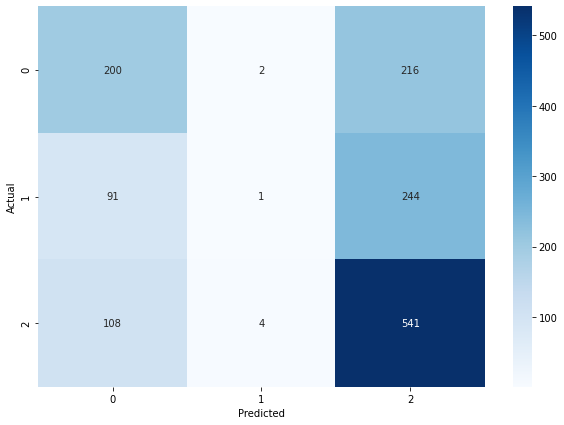

In [29]:
#confusion matrix plot
df_cm = pd.DataFrame(confusion_matrix(y_test, preds), index = [i for i in sorted(y_test.unique())],
                  columns = [i for i in sorted(y_test.unique())])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm = df_cm.astype(int)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')# font size
